<a href="https://colab.research.google.com/github/Ananthrkulks/Ananthrkulks/blob/main/malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
# Instead of importing np_utils, use tensorflow.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical
# Import BatchNormalization directly from tensorflow.keras.layers
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D,Activation,Dropout, BatchNormalization # Fixed import
from tensorflow.python.keras import Sequential,backend,optimizers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds



In [ ]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])




In [ ]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

train_dataset = tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))
DATASET_SIZE = len(dataset)

train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
print(list(train_dataset.as_numpy_iterator()))

val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
# The following line was changed from val_test_dataset to val_train_dataset
val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))
print(list(val_dataset.as_numpy_iterator()))

val_dataset = val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
print(list(val_dataset.as_numpy_iterator()))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5]
[6, 7]
[8, 9]


In [ ]:
dataset



<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [ ]:
dataset_info


tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [ ]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4,  i+1)
  plt.imshow(image)
  #plt.title(dataset_info.features[])


TypeError: Cannot iterate over a scalar tensor.

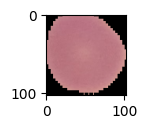

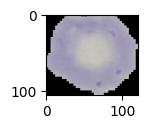

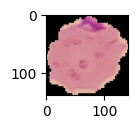

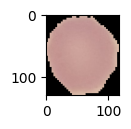

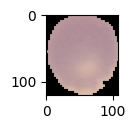

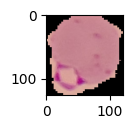

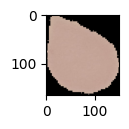

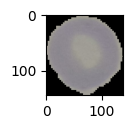

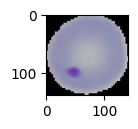

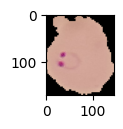

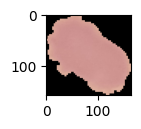

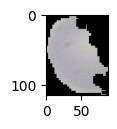

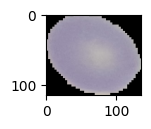

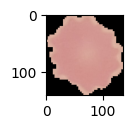

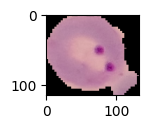

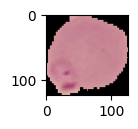

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the Malaria dataset
# The split argument was changed to 'train' to load only the training data
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split='train')

# Define ratios for splitting the dataset
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

# Get the total number of examples in the dataset
# dataset is a tf.data.Dataset object, so we can use its methods
DATASET_SIZE = len(list(dataset))

# Split the dataset into train, validation, and test sets
train_dataset = dataset.take(int(TRAIN_RATIO * DATASET_SIZE))
val_test_dataset = dataset.skip(int(TRAIN_RATIO * DATASET_SIZE))
val_dataset = val_test_dataset.take(int(VAL_RATIO * DATASET_SIZE))
test_dataset = val_test_dataset.skip(int(VAL_RATIO * DATASET_SIZE))

# Now you can iterate over the train_dataset to display images
for i, (image, label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    # plt.title(dataset_info.features[]) # Uncomment and adjust this line to display labels if needed
    plt.show() # Display each image immediately



In [ ]:
dataset_info.features['label'].int2str(0)

'parasitized'

**DATA PROCESSING**

In [ ]:
IM_SIZE = 224
def resizing(image, label):
  return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0 , label

In [ ]:
train_dataset = train_dataset.map(resizing)


In [ ]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[[[0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]
    ...
    [0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]]

   [[0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]
    ...
    [0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]]

   [[0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]
    ...
    [0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]]

   ...

   [[0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]
    ...
    [0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]]

   [[0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]
    ...
    [0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]]

   [[0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]
    ...
    [0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]]]


  [[[0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]
    ...
    [0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]]

   [[0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]
    ...
    [0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]]

   [[0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]
    ...
    [0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]]

   ...

   [[0. 0. 0.]
    [0. 0. 0.]
    [0. 0. 0.]
    ...
    [0. 0. 0.]
   

In [41]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
